In [7]:
#import libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

db_filename = 'dinofunworld.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

In [89]:
#This cell prepares the processed data for the chart that will draw below

#From the File we Know that attractionID of Atmosfear = '8'
df_Sequence = pd.read_sql_query("SELECT sequence FROM sequences where sequence LIKE '%-{0}-%'".format('8'), conn)

#  split the sequence and count each attendance of Atmosfear as 1
attendance_sequence = list()
for x in df_Sequence['sequence']:
  attendance = x.split('-')
  attendance = [1 if int(y)==8 else 0 for y in attendance]
  attendance_sequence.append(attendance)
sequences = np.array(attendance_sequence)

#calculate the sum of attendence at  Atmosfear 
AttendSum = sequences.sum(axis=0) 

# control chart displaying the attendance, the mean, and the standard deviation bands at one and two standard deviations.
mean = np.nanmean(AttendSum)
std = np.nanstd(AttendSum)
attendsum=list(enumerate(AttendSum))

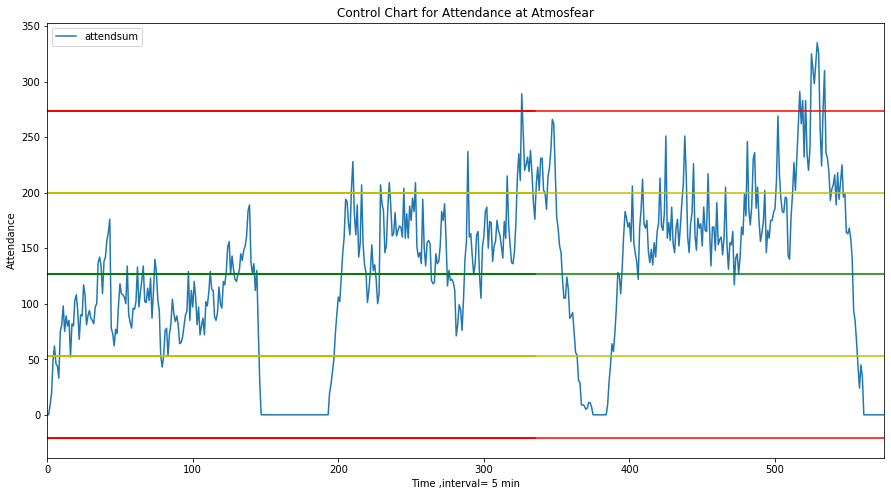

In [90]:
df_Atmos = pd.DataFrame(attendsum,AttendSum, columns=['Interval','attendsum']) 


df_Atmos.plot.line(y='attendsum', x='Interval', figsize = (15,8))
plt.plot(attendsum, [mean]*len(AttendSum), 'g-')
plt.plot(attendsum, [mean+std]*len(AttendSum), 'y-')
plt.plot(attendsum, [mean-std]*len(AttendSum), 'y-')
plt.plot(attendsum, [mean+2*std]*len(AttendSum), 'r-')
plt.plot(attendsum, [mean-2*std]*len(AttendSum), 'r-')

plt.xlabel('Time ,interval= 5 min')
plt.ylabel('Attendance')
plt.title('Control Chart for Attendance at Atmosfear')
plt.show()

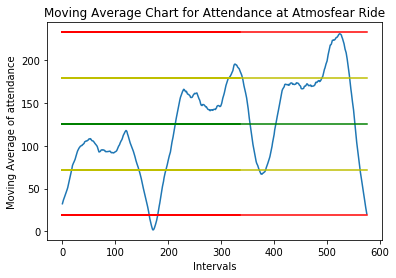

In [86]:
# moving average chart
df_Atmos = pd.DataFrame(attendsum,AttendSum, columns=['Interval','attendsum'])


w = 50
mean = np.nanmean(np.convolve(df_Atmos['attendsum'], np.ones(w,)/w, 'same'))
std = np.nanstd(np.convolve(df_Atmos['attendsum'], np.ones(w,)/w, 'same'))

plt.plot(df_Atmos['Interval'], np.convolve(df_Atmos['attendsum'], np.ones(w,)/w, 'same'), )

plt.plot(attendsum, [mean]*len(AttendSum), 'g-')
plt.plot(attendsum, [mean+std]*len(AttendSum), 'y-')
plt.plot(attendsum, [mean-std]*len(AttendSum), 'y-')
plt.plot(attendsum, [mean+2*std]*len(AttendSum), 'r-')
plt.plot(attendsum, [mean-2*std]*len(AttendSum), 'r-')

plt.xlabel('Intervals')
plt.ylabel('attendance')
plt.title('Moving Average Chart for Attendance at Atmosfear Ride')
plt.show()

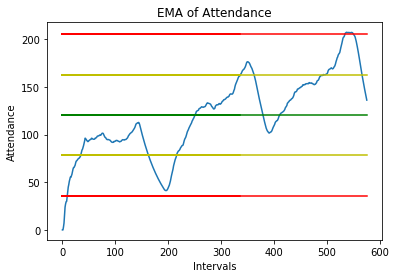

In [91]:
# exponentially-weight moving average


df_Atmos = df_Atmos.reset_index(drop=True)
span = 50
mean = np.nanmean(df_Atmos['attendsum'].ewm(span).mean())
std = np.nanstd(df_Atmos['attendsum'].ewm(span).mean())

plt.plot(df_Atmos['attendsum'].ewm(span).mean())
plt.plot(attendsum, [mean]*len(AttendSum), 'g-',label = 'mean')
plt.plot(attendsum, [mean+std]*len(AttendSum), 'y-',label = 'Standard')
plt.plot(attendsum, [mean-std]*len(AttendSum), 'y-')
plt.plot(attendsum, [mean+2*std]*len(AttendSum), 'r-',label = '2 Standard')
plt.plot(attendsum, [mean-2*std]*len(AttendSum), 'r-')

plt.ylabel('Attendance')
plt.xlabel('Intervals')
plt.title('EMA of Attendance')
plt.show()